In [160]:
# Import base libraries and dependencies
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# Machine Learning Libraries
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

# How to suppress warnings:
import warnings
warnings.filterwarnings('ignore')

In [161]:
# Load the data into a Pandas DataFrame
df = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [162]:
# Generate summary statistics
df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [163]:
# Plot your data to see what's in your DataFrame
df.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [164]:
df.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [165]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

In [166]:
# Create list of features to be scaled
cols = ['price_change_percentage_24h', 'price_change_percentage_7d', 
        'price_change_percentage_14d', 'price_change_percentage_30d',
        'price_change_percentage_60d', 'price_change_percentage_200d',
        'price_change_percentage_1y']

In [167]:
# Initialize the scaler
scaler = StandardScaler()

In [168]:
# Fit and transform the selected features
scaled_data = scaler.fit_transform(df[cols])

In [169]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=cols)

# Copy the crypto names from the original data
coin_ids = [
    'bitcoin', 'ethereum', 'tether', 'ripple', 'bitcoin-cash', 'binancecoin',
    'chainlink', 'cardano', 'litecoin', 'bitcoin-cash-sv', 'crypto-com-chain',
    'usd-coin', 'eos', 'monero', 'tron', 'tezos', 'okb', 'stellar', 'cosmos',
    'cdai', 'neo', 'wrapped-bitcoin', 'leo-token', 'huobi-token', 'nem',
    'binance-usd', 'iota', 'vechain', 'zcash', 'theta-token', 'dash',
    'ethereum-classic', 'ethlend', 'maker', 'havven', 'omisego',
    'celsius-degree-token', 'ontology', 'ftx-token', 'true-usd', 'digibyte'
]


In [170]:
# Add the crypto names to the DataFrame
df_scaled['coin_id'] = coin_ids

In [171]:
# Set the coinid column as index
df_scaled = df_scaled.set_index('coin_id')

# Display sample data
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [172]:
# First use tsne to see if there are any clusters
tsne = TSNE()
df_tsne1 = pd.DataFrame(tsne.fit_transform(df_scaled))

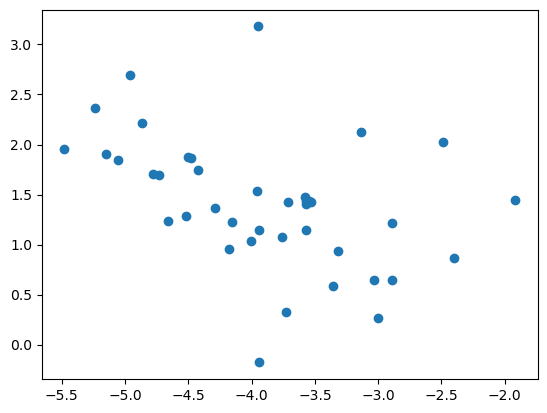

In [173]:
# Plot the t-SNE results
plt.scatter(df_tsne1[0], df_tsne1[1])
plt.show()

In [174]:
# Create a list with the number of k-values from 1 to 11 (we'll start the range at 2 of 1 as starting at 1 causes an error)
k = list(range(2, 20))


In [175]:
# Create an empty list to store the inertia values
inertia = []
silhouettes = []
cha_chas = []

# Create a for loop to compute the inertia with each possible value of k

# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(df_scaled)
    
    # predict the model
    predictions = k_model.predict(df_scaled)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)
    score = silhouette_score(df_scaled, predictions)
    silhouettes.append(score)
    
    cha_cha = calinski_harabasz_score(df_scaled, predictions)
    cha_chas.append(cha_cha)
    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 19
Finished 3 out of 19
Finished 4 out of 19
Finished 5 out of 19
Finished 6 out of 19
Finished 7 out of 19
Finished 8 out of 19
Finished 9 out of 19
Finished 10 out of 19
Finished 11 out of 19
Finished 12 out of 19
Finished 13 out of 19
Finished 14 out of 19
Finished 15 out of 19
Finished 16 out of 19
Finished 17 out of 19
Finished 18 out of 19
Finished 19 out of 19


In [176]:
# Create a dictionary with the data to plot the Elbow curve
elbow = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": cha_chas}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow)

df_elbow["acc"] = df_elbow.inertia.diff()
df_elbow

,k,inertia,silhouette_score,cha_score,acc
0,2,212.123342,0.690885,13.766470,NaN
1,3,165.136752,0.260810,14.021117,-46.986590
2,4,79.022435,0.314482,32.459853,-86.114317
3,5,66.413051,0.323913,29.892958,-12.609385
4,6,61.634088,0.251616,25.595599,-4.778963
5,7,46.074467,0.258868,29.631263,-15.559621
6,8,43.392694,0.252185,26.466078,-2.681773
7,9,32.913223,0.260185,30.879599,-10.479471
8,10,30.469111,0.168099,29.000071,-2.444111
9,11,26.480101,0.175935,29.514981,-3.989010


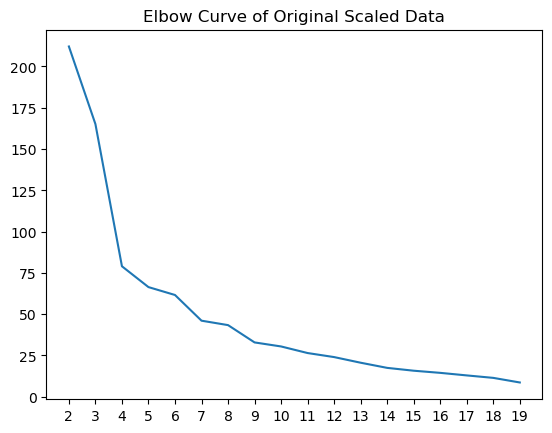

In [177]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.title("Elbow Curve of Original Scaled Data")
plt.xticks(df_elbow["k"])
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for k is 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [178]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=1)

In [179]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_scaled)

KMeans(n_clusters=4, random_state=1)

In [180]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_predictions = kmeans_model.predict(df_scaled)

# Print the resulting array of cluster values.
print(cluster_predictions)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [181]:
# Create a copy of the DataFrame
df_scaled_copy = df_scaled.copy()

In [182]:
# Add a new column to the DataFrame with the predicted clusters
df_scaled_copy["clusters"] = cluster_predictions

# Display sample data
df_scaled_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [183]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="clusters",
    hover_cols=["coin_id"],
)

:NdOverlay   [clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [184]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [201]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_model = pca.fit_transform(df_scaled)

# View the first five rows of the DataFrame. 
pca_df = pd.DataFrame(
    data=pca_model, columns=["PC1", "PC2", "PC3"], index=df_scaled.index
)
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [186]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.5%

In [202]:
# Create a new DataFrame with the PCA data.


# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [188]:
# First use tsne to see if there are any clusters
tsne = TSNE()
df_tsne1 = pd.DataFrame(tsne.fit_transform(pca_df))

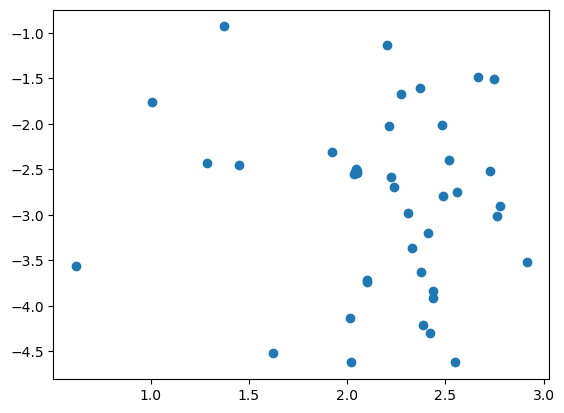

In [189]:
# Use a scatter plot to see if there are any clusters
plt.scatter(df_tsne1[0], df_tsne1[1])
plt.show()

In [190]:
# Create a list with the number of k-values from 1 to 11 (we'll use 2, 20 instead of 11)
k = list(range(2, 20))

In [191]:
# Create an empty list to store the inertia values
inertia = []
silhouettes = []
cha_chas = []

# Create a for loop to compute the inertia with each possible value of k

# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(pca_df)
    
    # predict the model
    predictions = k_model.predict(pca_df)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)
    score = silhouette_score(pca_df, predictions)
    silhouettes.append(score)
    
    cha_cha = calinski_harabasz_score(pca_df, predictions)
    cha_chas.append(cha_cha)
    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 19
Finished 3 out of 19
Finished 4 out of 19
Finished 5 out of 19
Finished 6 out of 19
Finished 7 out of 19
Finished 8 out of 19
Finished 9 out of 19
Finished 10 out of 19
Finished 11 out of 19
Finished 12 out of 19
Finished 13 out of 19
Finished 14 out of 19
Finished 15 out of 19
Finished 16 out of 19
Finished 17 out of 19
Finished 18 out of 19
Finished 19 out of 19


In [192]:
# Create a dictionary with the data to plot the Elbow curve
data = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": cha_chas}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(data)

df_elbow_pca["acc"] = df_elbow_pca.inertia.diff()
df_elbow_pca

,k,inertia,silhouette_score,cha_score,acc
0,2,182.339530,0.728406,15.941950,NaN
1,3,135.442408,0.356130,17.034560,-46.897122
2,4,49.665497,0.420800,51.455694,-85.776911
3,5,38.672582,0.405662,50.780512,-10.992914
4,6,34.507577,0.334511,45.107936,-4.165006
5,7,23.728365,0.375378,55.678472,-10.779212
6,8,18.574523,0.316385,60.481348,-5.153841
7,9,15.572672,0.323751,61.980734,-3.001851
8,10,11.407667,0.350621,74.116423,-4.165006
9,11,8.058822,0.361557,92.624679,-3.348845


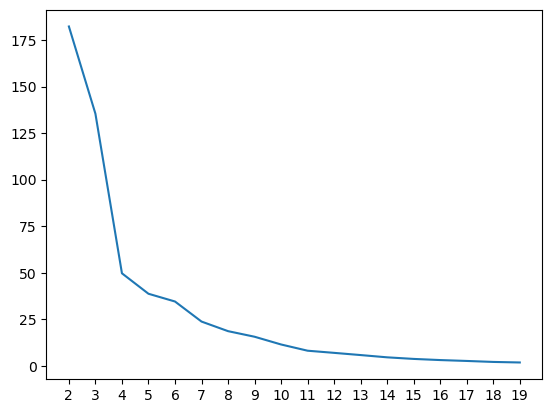

In [193]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(df_elbow_pca["k"], df_elbow_pca["inertia"])
plt.xticks(df_elbow_pca["k"])
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [194]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=1)

In [195]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(pca_df)

KMeans(n_clusters=4, random_state=1)

In [196]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predictions = kmeans_model.predict(pca_df)

# Print the resulting array of cluster values.
print(predictions)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [197]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy["clusters"] = predictions

# Display sample data
df_pca_copy.head()


,PCA1,PCA2,PCA3,clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [198]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_pca_copy.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="clusters",
    hover_cols=["coin_id"],
)

:NdOverlay   [clusters]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [199]:
# Composite plot to contrast the Elbow curves
original = df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title="Original",
    color='blue'
)

pca_elbow = df_elbow_pca.hvplot.line(
    x="k",
    y="inertia",
    title="PCA",
    color='orange'
)

# Combine the plots
composite_plot = original + pca_elbow
composite_plot

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [200]:
# Composite plot to contrast the clusters
scaled_scatter = df_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    title = "Scaled",
    by="clusters",
    hover_cols=["coin_id"],
)

pca_scatter = df_pca_copy.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    title = "PCA",
    by="clusters",
    hover_cols=["coin_id"],
)
composite_plot = scaled_scatter + pca_scatter
composite_plot

:Layout
   .NdOverlay.I  :NdOverlay   [clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [clusters]
      :Scatter   [PCA1]   (PCA2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** It appears as if there are more outliers with fewer features. Using more features, the clusters are refined and concentrated, leading to better predictions.